<a href="https://colab.research.google.com/github/parastooAflaki/Blog/blob/master/GAN-MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow's ***eager*** ***execution*** is an imperative programming environment that evaluates operations immediately, without building graphs: operations return concrete values instead of constructing a computational graph to run later.

debug note: if we're using  tensorflow 2, its enabled by defaul. otherwise to use eager execution we must use *tf.enable_eager_execution()* right after implementing tensorflow.
debuge note:
restarting kernel if exception hanppens!

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
tf.enable_eager_execution()

Using TensorFlow backend.


In [0]:
BATCH_SIZE = 256
BUFFER_SIZE = 60000
EPOCHES = 300
OUTPUT_DIR = "img" # The output directory where the images of the generator a stored during training

Now we’ll load the MNIST dataset directly from TensorFlow

In [0]:
mnist = keras.datasets.mnist

In [0]:
(X_train,Y_train) , (X_test,Y_test ) = mnist.load_data()
X_train.shape

(60000, 28, 28)

we have 60.000 images in total with a height and width of 28 pixels

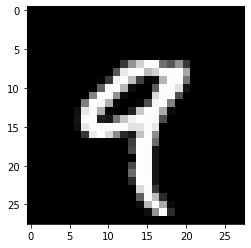

In [0]:
plt.imshow(X_train[4], cmap = "gray")

In [0]:
# using tf.data.Dataset.from_tensor_slices() method 
X_train.reshape(X_train.shape[0] , 28 *28)
gfg = tf.data.Dataset.from_tensor_slices([[1,2,3,4],[12,8,3,9],[77,65,4,13]]).shuffle(BUFFER_SIZE).batch(2) 
for ele in gfg:
    print(ele.numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: id=27123, shape=(2, 4), dtype=int32, numpy=
array([[77, 65,  4, 13],
       [ 1,  2,  3,  4]], dtype=int32)>>
<bound method _EagerTensorBase.numpy of <tf.Tensor: id=27124, shape=(1, 4), dtype=int32, numpy=array([[12,  8,  3,  9]], dtype=int32)>>


In [0]:
# using tf.data.Dataset.from_tensor_slices() method 
X_train = X_train.astype("float32")
X_train = (X_train - 127.5) / 127.5
X_train.reshape(X_train.shape[0] , 28 *28)
gfg = tf.data.Dataset.from_tensor_slices(X_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE) 
